# Collision Avoidance Analysis for Lane Changing and Merging

## Modeling

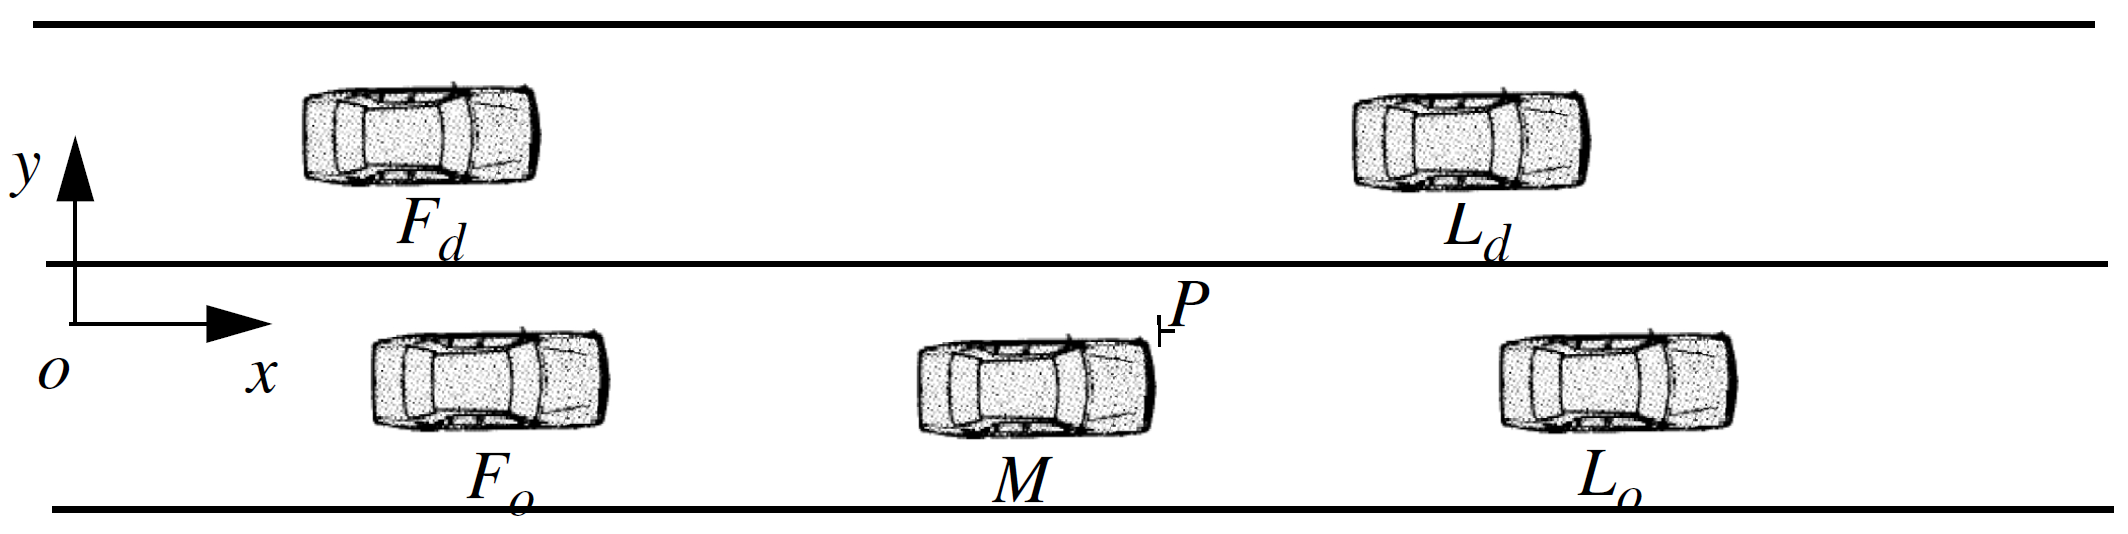
symbol | explanation
:-|:-
$Adc$ | adc vehicle
$L_{d}$ | **leading** vehicle in the **destination** lane
$F_{d}$ | **following** vehicle in the **destination** lane
$L_{o}$ | **leading** vehicle in the **originating** lane
$F_{o}$ | **following** vehicle in the **originating** lane
$t_{adj}$ | required time for the merging vehicle to adjust its longitudinal position and velocity before adc starts merging to the destination lane
$i$ | vehicle $i\in0\{L_d, F_d, L_o, F_o, Adc\}$
$a_i(t)$ | longitudinal acceleration/deceleration
$v_i(t)$ | longitudinal velocity 
$x_i(t)$ | longitudinal position of **<font color="red">upper right corner</font>** of the vehicle $i$
$y_i(t)$ | lateral position of **<font color="red">upper right corner</font>** of the vehicle $i$

lateral acceleration  
$a_{lat}(t) = 
\begin{cases}
\frac{2\pi H}{t_{lat}^2}\cdot\sin\left(\frac{2\pi}{t_{lat}}(t-t_{adj})\right) & t_{adj}\leq t \leq t_{adj}+t_{lat}\\
0 & otherwise
\end{cases} $

> $H$ is total lateral displacement for adc vehicle; 车道宽度(可从地图读取到)  
$t_{adj}$ is time elapse before lateral acceleration applies;(输入)  
$t_{lat}$ is total time, after $t_{adj}$, needed to complete the lane change;(输入)  

lateral velocity  
$v_{lat}(t) = 
\begin{cases}
\frac{-H}{t_{lat}}\cdot\cos\left(\frac{2\pi}{t_{lat}}(t-t_{adj})\right) + \frac{H}{t_{lat}} & t_{adj}\leq t \leq t_{adj}+t_{lat}\\
0 & otherwise \cdots (2)
\end{cases} $

lateral position of the upper right corner of $Adc$  
$y_{lat}(t) = 
\begin{cases}
H & t \geq t_{adj}+t_{lat} \\
\frac{-H}{2\pi}\cdot\sin\left(\frac{2\pi}{t_{lat}}(t-t_{adj})\right) + \frac{H}{t_{lat}}(t-t_{adj}) & t_{adj}\leq t \leq t_{adj}+t_{lat} \\
0 & otherwise \cdots (3)
\end{cases} $

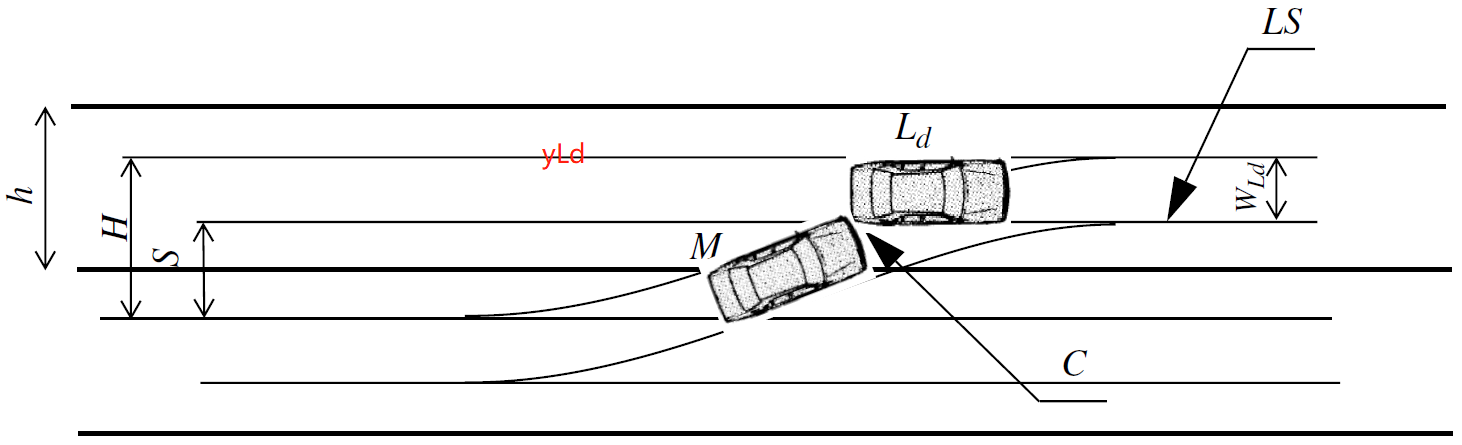

$y_{lat}(t) = y_{L_d} – w_{L_d} \cdots (4)\implies $ obtain $t_C$   
> $y_{L_d}$ is lateral position of upper right corner of the leading vehicle $L_d$ in the destination lane;  
$w_{L_d}$ is width of the leading vehicle $L_d$ in the destination lane;  

$x_{Adc}(t) < x_{L_d}(t) - \mathscr{L}, \forall t \in [t_C + t_{adj}, T]$  
>$x_{Adc}(t) < x_{L_d}(t) – Length_{L_d} – Width_{Adc} \cdot \sin(\theta(t))$  
$\mathscr{L} = Length_{L_d} + Width_{Adc} \cdot \max_t(\sin \theta(t)) = Length_{L_d} + Width_{Adc} × Sin(\theta(t_C + t_{adj}))$  
$tan(\theta(t)) = \frac{v_{lat}(t)}{v_{Adc}(t)}$

Let $Sr(t) = x_{L_d}(t) – \mathscr{L} – x_{Adc}(t)$
> longitudinal spacing between (point C of $Adc$ vehicle) and (rear end/bumper of vehicle $L_d$)

$Sr(t) = Sr(0) + \int_0^t \left[ \int_0^{\lambda}\left(a_{L_d}(\tau)-a_{Adc}(\tau)\right)d\tau \right] d\lambda + \left[v_{L_d}(0)–v_{Adc}(0)\right]\cdot t > 0, \forall t \in [t_C + t_{adj}, T]$
> $Sr(t) = x_{L_d}(t) – \mathscr{L} – x_{Adc}(t)$  
$Sr(0) = x_{L_d}(0) – \mathscr{L} – x_{Adc}(0)$  
$Sr(t) = Sr(0) + \left[x_{L_d}(t) – x_{Adc}(t)\right] - \left[x_{L_d}(0) – x_{Adc}(0)\right]$

Minimum Longitudinal Safety Spacing:  
$MSS(L_d,Adc) = \min Sr(0) = \max_t \left\{ \int_0^t\left[ \int_0^{\lambda} \left( a_{Adc}(\tau) - a_{L_d}(\tau) \right) d\tau \right]d\lambda + \left[ v_{Adc}(0) - v_{L_d}(0)\right]\cdot t \right\}, \forall t \in [t_C+t_{adj}, T] \cdots (10)$
> The minimum value of $Sr(0)$, i.e., the minimum initial longitudinal relative spacing from $Adc$ to $L_d$, for collision free vehicle merging 

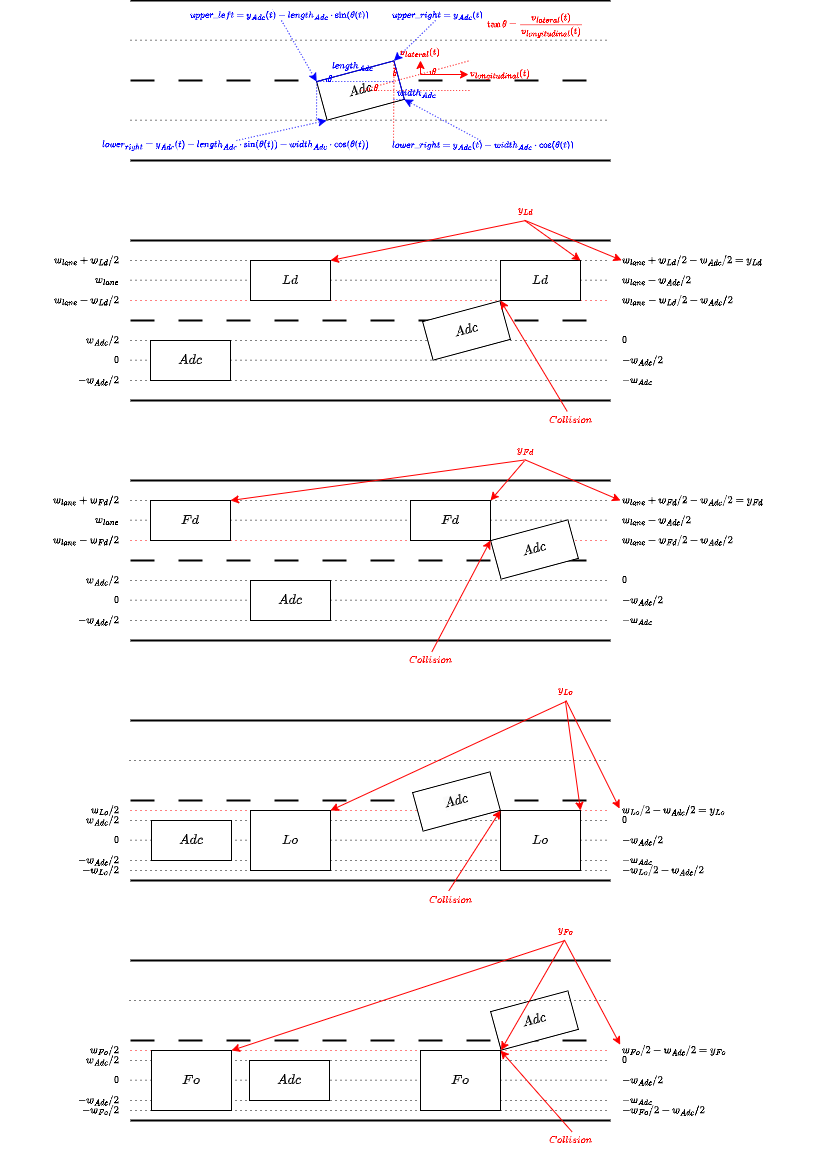

$\begin{aligned}
y_{upper\_left}(t) & = y_{lat}(t)-length_{Adc}\cdot\sin(\theta(t)) \\
& = y_{lat}(t)-length_{Adc}\cdot\frac{v_{lat_{Adc}}(t)}{\sqrt{v_{lat_{Adc}}^2(t)+v_{long_{Adc}}^2(t)}}=y_{Fd}-w_{Fd} \cdots (13)
\end{aligned}$

$MSS(Adc, F_d) = \max_t \left\{ \int_0^t\left[ \int_0^{\lambda} \left( a_{F_d}(\tau) - a_{Adc}(\tau) \right) d\tau \right]d\lambda + \left[ v_{F_d}(0) - v_{Adc}(0)\right]\cdot t \right\}, \forall t \in [t_C+t_{adj}, T] \cdots (18)$

$\begin{aligned}
y_{lower\_right}(t) & = y_{lat}(t)-width_{Adc}\cdot\cos(\theta(t)) \\
& = y_{lat}(t)-width_{Adc}\cdot\frac{v_{long_{Adc}}(t)}{\sqrt{v_{lat_{Adc}}^2(t)+v_{long_{Adc}}^2(t)}} = y_{Lo} \cdots (20)
\end{aligned}$

$MSS(L_o,Adc) = \max_t \left\{ \int_0^t\left[ \int_0^{\lambda} \left( a_{Adc}(\tau) - a_{L_o}(\tau) \right) d\tau \right]d\lambda + \left[ v_{Adc}(0) - v_{L_o}(0)\right]\cdot t, 0 \right\}, \forall t \in [0, t_C+t_{adj}] \cdots (25)$

$\begin{aligned}
y_{lower\_left}(t) & = y_{lat}(t)-length_{Adc}\cdot\sin(\theta(t))-width_{Adc}\cdot\cos(\theta(t)) \\
& = y_{lat}(t)-length_{Adc}\cdot\frac{v_{lat_{Adc}}(t)}{\sqrt{v_{lat_{Adc}}^2(t)+v_{long_{Adc}}^2(t)}}-width_{Adc}\cdot\frac{v_{long_{Adc}}(t)}{\sqrt{v_{lat_{Adc}}^2(t)+v_{long_{Adc}}^2(t)}} = y_{Fo} \cdots (27)
\end{aligned}$

$MSS(Adc, F_o) = \max_t \left\{ \int_0^t\left[ \int_0^{\lambda} \left( a_{F_o}(\tau) - a_{Adc}(\tau) \right) d\tau \right]d\lambda + \left[ v_{F_o}(0) - v_{Adc}(0)\right]\cdot t, 0 \right\}, \forall t \in [0, t_C+t_{adj}] \cdots (32)$

## code

In [14]:
import numpy, math
import matplotlib.pyplot as plt

class Vehicle:
    def __init__(self, name):
        self.name = name
        self.a = 0.0
        self.v = 0.0
        self.x = 0.0
        self.y = 0.0
        self.length = 4.85
        self.width = 1.965
        
t_lat = 3
T = t_lat
lane_width = 3
a_comf = 2.0 # maximum acceleration that maintains passenger comfort (unit: m/s^2)

Adc = Vehicle("Adc")
Ld = Vehicle("leading destination")
Fd = Vehicle("following destination")
Lo = Vehicle("leading originating")
Fo = Vehicle("following originating")

Adc.v = 50/3.6
Ld.v = 60/3.6
Fd.v = 55/3.6
Lo.v = 52/3.6
Fo.v = 48/3.6

In [15]:
def lateral_position(t, t_lat):
    # lateral position of upper right corner, eq 3
    if t >= t_lat:
        return lane_width
    elif 0 < t < t_lat:
        return (-lane_width/(2*math.pi))*math.sin((2*math.pi/t_lat)*t)+(lane_width/t_lat)*t
    else:
        return 0

def lateral_velocity(t, t_lat):
    # lateral velocity of upper right corner, eq 2
    if 0 < t < t_lat:
        return (-lane_width/t_lat)*math.cos((2*math.pi/t_lat)*t)+lane_width/t_lat
    else:
        return 0

### Calculate time of collision

In [16]:
def time_collision(vehicle, t_lat):
    step = 0.01
    tc = float("inf")
    t = 0
    if vehicle.name == "leading destination":
        # eq_4
        while t < t_lat:
            if lateral_position(t, t_lat) < lane_width - Adc.width/2 - Ld.width/2:
                t += step
            else:
                return t;
    elif vehicle.name == "following destination":
        # eq_13
        while t < t_lat:
            longitudinal_velocity = Adc.v + max(min(Adc.a, a_comf), -a_comf) * t
            if lateral_position(t, t_lat) - Adc.length*(lateral_velocity(t, t_lat)/(lateral_velocity(t, t_lat)**2+longitudinal_velocity**2)**0.5) < lane_width - Adc.width/2 - Fd.width/2:
                t += step
            else:
                return t;
    elif vehicle.name == "leading originating":
        # eq_20
        while t < t_lat:
            longitudinal_velocity = Adc.v + max(min(Adc.a, a_comf), -a_comf) * t
            if lateral_position(t, t_lat) - Adc.width*(longitudinal_velocity/(lateral_velocity(t, t_lat)**2+longitudinal_velocity**2)**0.5) < Lo.width/2 - Adc.width/2:
                t += step
            else:
                return t;
    elif vehicle.name == "following originating":
        # eq_27
        while t < t_lat:
            longitudinal_velocity = Adc.v + max(min(Adc.a, a_comf), -a_comf) * t
            if lateral_position(t, t_lat) - Adc.length*(lateral_velocity(t, t_lat)/(lateral_velocity(t, t_lat)**2+longitudinal_velocity**2)**0.5) - Adc.width*(longitudinal_velocity/(lateral_velocity(t, t_lat)**2+longitudinal_velocity**2)**0.5) < Fo.width/2 - Adc.width/2:
                t += step
            else:
                return t;
    return tc

tc of Ld = 1.270000000000001
tc of Fd = 1.6100000000000012
tc of Lo = 1.7300000000000013
tc of Fo = 2.0300000000000007


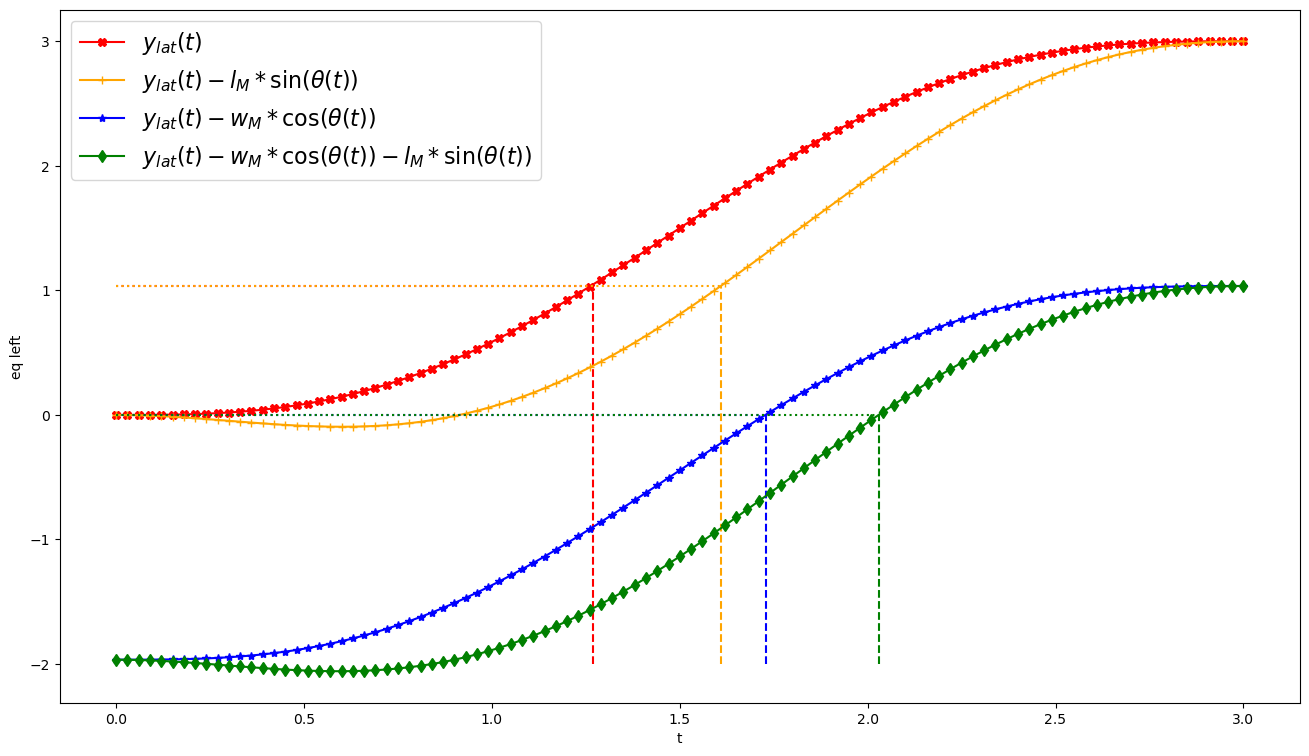

In [17]:
times = numpy.linspace(0, t_lat, 101)
eq_4 = []
eq_13 = []
eq_20 = []
eq_27 = []

for t in times:
    eq_4.append(lateral_position(t, t_lat))
    eq_13.append(lateral_position(t, t_lat)
                  - Adc.length*(lateral_velocity(t, t_lat)/(lateral_velocity(t, t_lat)**2+Adc.v**2)**0.5))
    eq_20.append(lateral_position(t, t_lat)
                  - Adc.width*(Adc.v/(lateral_velocity(t, t_lat)**2+Adc.v**2)**0.5))
    eq_27.append(lateral_position(t, t_lat)
                  - Adc.length*(lateral_velocity(t, t_lat)/(lateral_velocity(t, t_lat)**2+Adc.v**2)**0.5)
                  - Adc.width*(Adc.v/(lateral_velocity(t, t_lat)**2+Adc.v**2)**0.5))
    
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)

color = "red"
S = lane_width - Adc.width/2 - Ld.width/2
tc = time_collision(Ld, t_lat)
print("tc of Ld =", tc)
ax.plot(times, eq_4, color=color, marker='X', label=r"$y_{lat}(t)$")
ax.hlines(S, 0, tc, colors=color, linestyles='dotted')
ax.vlines(tc, -2, S, colors=color, linestyles='dashed')

color = "orange"
S = lane_width - Adc.width/2 - Fd.width/2
tc = time_collision(Fd, t_lat)
print("tc of Fd =", tc)
ax.plot(times, eq_13, color=color, marker='+', label=r"$y_{lat}(t)-l_M*\sin(\theta(t))$")
ax.hlines(S, 0, tc, colors=color, linestyles='dotted')
ax.vlines(tc, -2, S, colors=color, linestyles='dashed')

color = "blue"
S = Lo.width/2 - Adc.width/2
tc = time_collision(Lo, t_lat)
print("tc of Lo =", tc)
ax.plot(times, eq_20, color=color, marker='*', label="$y_{lat}(t)-w_M*\cos(\\theta(t))$")
ax.hlines(S, 0, tc, colors=color, linestyles='dotted')
ax.vlines(tc, -2, S, colors=color, linestyles='dashed')

color = "green"
S = Fo.width/2 - Adc.width/2
tc = time_collision(Fo, t_lat)
print("tc of Fo =", tc)
ax.plot(times, eq_27, color=color, marker='d', label="$y_{lat}(t)-w_M*\cos(\\theta(t))-l_M*\sin(\\theta(t))$")
ax.hlines(S, 0, tc, colors=color, linestyles='dotted')
ax.vlines(tc, -2, S, colors=color, linestyles='dashed')

ax.set_xlabel('t')
ax.set_ylabel('eq left')
ax.legend(loc='upper left', fontsize=16)

### Minimum longitudinal Safety Spacings

In [18]:
def Minimum_longitudinal_Safety_Spacings(vehicle, t_lat, alpha):
    # 加速
    T = t_lat * alpha
    step = 0.01
    mss = -float("inf")
    if vehicle.name == "leading destination":
        # eq 10
        for t in numpy.arange(time_collision(vehicle, t_lat), T, step):
            mss = max(mss, 0.5*(Adc.a - vehicle.a)*t**2 + (Adc.v - vehicle.v)*t)
    elif vehicle.name == "following destination":
        # eq 18
        for t in numpy.arange(time_collision(vehicle, t_lat), T, step):
            mss = max(mss, 0.5*(vehicle.a - Adc.a)*t**2 + (vehicle.v - Adc.v)*t)
    elif vehicle.name == "leading originating":
        # eq 25
        for t in numpy.arange(0, time_collision(vehicle, t_lat), step):
            mss = max(mss, 0.5*(Adc.a - vehicle.a)*t**2 + (Adc.v - vehicle.v)*t)
    elif vehicle.name == "following originating":
        # eq 32
        for t in numpy.arange(0, time_collision(vehicle, t_lat), step):
            mss = max(mss, 0.5*(vehicle.a - Adc.a)*t**2 + (vehicle.v - Adc.v)*t)
    return mss

In [19]:
def Minimum_longitudinal_Safety_Spacings2(vehicle, t_lat, alpha):
    # 匀速
    T = t_lat * alpha
    if vehicle.name == "leading destination":
        # eq 35
        if Adc.v - vehicle.v >= 0:
            return (Adc.v - vehicle.v) * T
        else:
            return (Adc.v - vehicle.v) * time_collision(vehicle, t_lat)
    elif vehicle.name == "following destination":
        # eq 38
        if vehicle.v - Adc.v >= 0:
            return (vehicle.v - Adc.v) * T
        else:
            return (vehicle.v - Adc.v) * time_collision(vehicle, t_lat)
    elif vehicle.name == "leading originating":
        # eq 41
        if Adc.v - vehicle.v >= 0:
            return (Adc.v - vehicle.v) * time_collision(vehicle, t_lat)
        else:
            return 0
    elif vehicle.name == "following originating":
        # eq 44
        if vehicle.v - Adc.v >= 0:
            return (vehicle.v - Adc.v) * time_collision(vehicle, t_lat)
        else:
            return 0

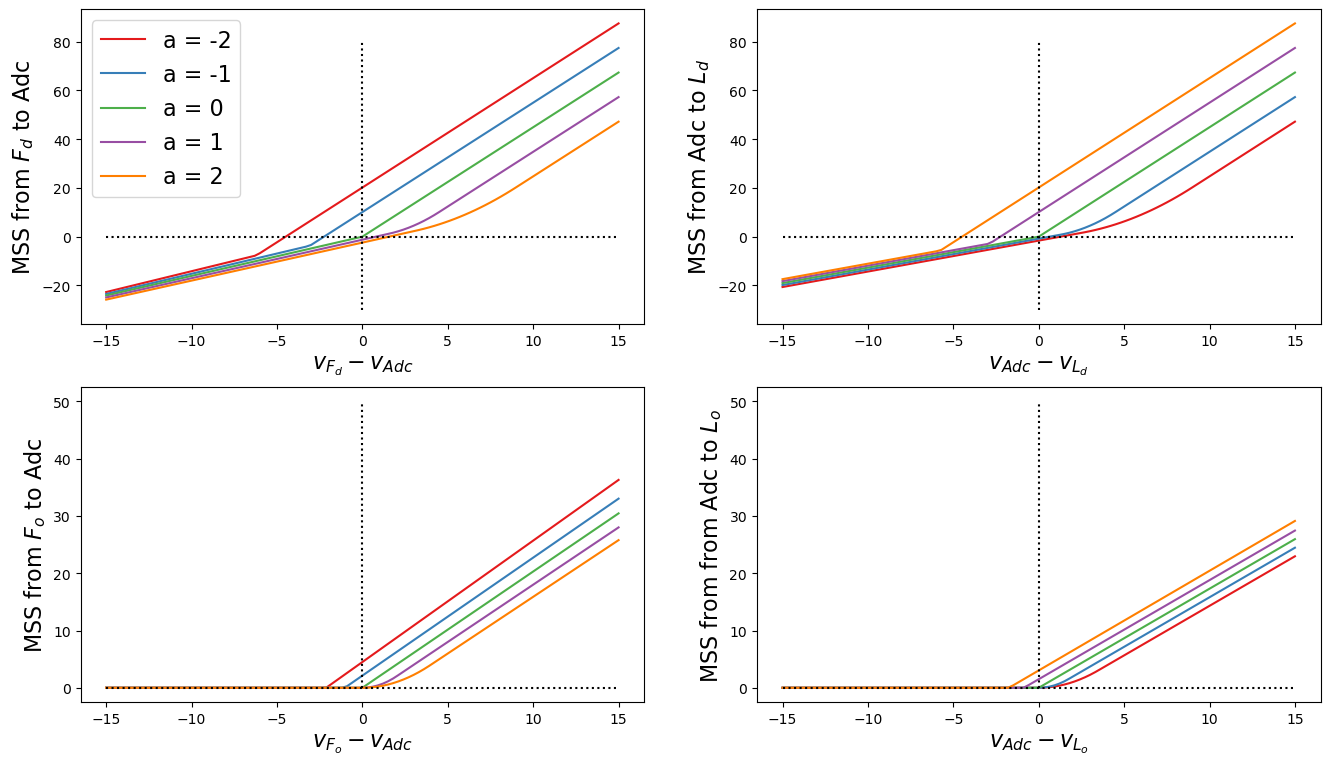

In [20]:
cmap=plt.get_cmap("Set1")
# Fig.6 - 9
delta_v = numpy.linspace(-15, 15, 101)
fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


for index in range(5):
    Adc.a = index - 2

    mss = [[], # from_Fd_to_Adc
            [], # from_Adc_to_Ld
            [], # from_Fo_to_Adc
            []] # from_Adc_to_Lo
    mss_from_Fd_to_Adc = []
    mss_from_Adc_to_Ld = []
    mss_from_Fo_to_Adc = []
    mss_from_Adc_to_Lo = []
    for delta in delta_v:
        Fd.v = delta + Adc.v
        mss[0].append(Minimum_longitudinal_Safety_Spacings(Fd, t_lat, 1.5))
        Ld.v = Adc.v - delta
        mss[1].append(Minimum_longitudinal_Safety_Spacings(Ld, t_lat, 1.5))
        Fo.v = delta + Adc.v 
        mss[2].append(Minimum_longitudinal_Safety_Spacings(Fo, t_lat, 1.5))
        Lo.v = Adc.v - delta
        mss[3].append(Minimum_longitudinal_Safety_Spacings(Lo, t_lat, 1.5))
        
    ax1.plot(delta_v, mss[0], color=cmap(index), label="a = "+str(Adc.a))
    ax2.plot(delta_v, mss[1], color=cmap(index), label="a = "+str(Adc.a))
    ax3.plot(delta_v, mss[2], color=cmap(index), label="a = "+str(Adc.a))
    ax4.plot(delta_v, mss[3], color=cmap(index), label="a = "+str(Adc.a))

ax1.hlines(0, delta_v[0], delta_v[-1], color="black", linestyles='dotted')
ax1.vlines(0, -30, 80, color="black", linestyles='dotted')
ax2.hlines(0, delta_v[0], delta_v[-1], color="black", linestyles='dotted')
ax2.vlines(0, -30, 80, color="black", linestyles='dotted')
ax3.hlines(0, delta_v[0], delta_v[-1], color="black", linestyles='dotted')
ax3.vlines(0, 0, 50, color="black", linestyles='dotted')
ax4.hlines(0, delta_v[0], delta_v[-1], color="black", linestyles='dotted')
ax4.vlines(0, 0, 50, color="black", linestyles='dotted')
ax1.set_xlabel('$v_{F_d} - v_{Adc}$', fontsize=16)
ax1.set_ylabel('MSS from $F_d$ to Adc', fontsize=16)
ax2.set_xlabel('$v_{Adc} - v_{L_d}$', fontsize=16)
ax2.set_ylabel('MSS from Adc to $L_d$', fontsize=16)
ax3.set_xlabel('$v_{F_o} - v_{Adc}$', fontsize=16)
ax3.set_ylabel('MSS from $F_o$ to Adc', fontsize=16)
ax4.set_xlabel('$v_{Adc} - v_{L_o}$', fontsize=16)
ax4.set_ylabel('MSS from from Adc to $L_o$', fontsize=16)
ax1.legend(loc='upper left', fontsize=16)

### 低速

In [21]:
Adc.v = 10/3.6
Adc.a = 0.0
Lo.v = 1/3.6
for tt in numpy.linspace(2, 4, 5):
    print("Completion time of lane change =", tt, ", Minimum longitudinal Safety Spacings =", Minimum_longitudinal_Safety_Spacings(Lo, tt, 1.5))

Completion time of lane change = 2.0 , Minimum longitudinal Safety Spacings = 2.375
Completion time of lane change = 2.5 , Minimum longitudinal Safety Spacings = 3.125
Completion time of lane change = 3.0 , Minimum longitudinal Safety Spacings = 3.875
Completion time of lane change = 3.5 , Minimum longitudinal Safety Spacings = 4.65
Completion time of lane change = 4.0 , Minimum longitudinal Safety Spacings = 5.375


### 高速

In [22]:
Adc.v = 50/3.6
Adc.a = 0.0
Ld.v = 60/3.6
Minimum_longitudinal_Safety_Spacings(Ld, t_lat, 1.5)

-3.5277777777777812

In [23]:
Fd.v = 60/3.6
Minimum_longitudinal_Safety_Spacings(Fd, t_lat, 1.5)

12.472222222222236

In [24]:
Ld.v = 55/3.6
Minimum_longitudinal_Safety_Spacings(Ld, t_lat, 1.5)

-1.7638888888888884

In [25]:
Fd.v = 55/3.6
Minimum_longitudinal_Safety_Spacings(Fd, t_lat, 1.5)

6.23611111111111

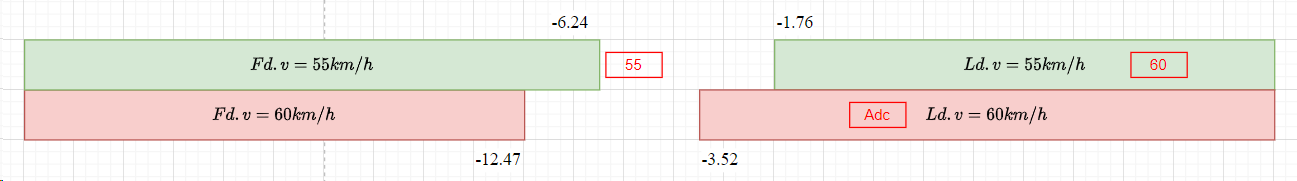